# Experiment 2: MLP Regression

In [64]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.metrics import plot_roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [65]:
df = pd.read_csv("../../data/energy/df.csv", )
df.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
0,1054,32658,-16.064,-76.599,112.441,0.000,0.955,-0.296,35,28449.0,13.415,1,1
1,1054,32671,-16.208,-76.707,112.611,-0.719,0.415,0.558,24,28450.0,13.415,1,1
2,1053,32639,-16.064,-76.624,122.011,0.000,0.830,0.558,12,28450.0,13.415,1,1
3,1054,32670,-16.064,-76.624,112.611,0.000,0.830,0.558,54,28450.0,13.415,1,1
4,1054,32664,-15.968,-76.625,112.559,0.478,0.827,0.296,47,28451.0,13.415,1,1


# Define target and predictors

In [73]:
y = df['energy']

X = df[['pos_x', 'pos_y', 'pos_z',
        'dir_x', 'dir_y', 'dir_z',
        'tot', 'time', 'label']]

SKEW in Target Variable after BOXCOX TRANSFORMATION : 0.024214883060462995


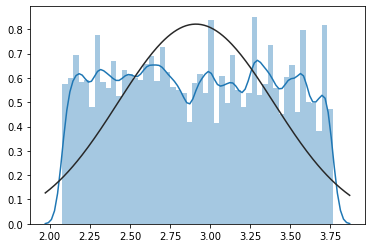

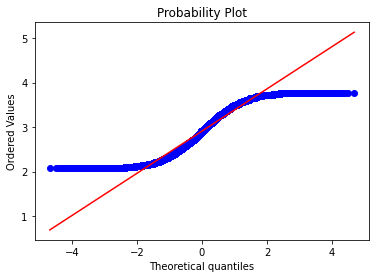

In [74]:
boxcox_y,_ = stats.boxcox(y)
boxcox_y = pd.Series(boxcox_y)
print("SKEW in Target Variable after BOXCOX TRANSFORMATION : {}".format(boxcox_y.skew()))

sns.distplot(boxcox_y , fit=stats.norm)
fig = plt.figure()
res = stats.probplot(boxcox_y,
                     dist=stats.norm,
                     plot=plt)

In [75]:
y = boxcox_y

# Split Dataset 

Dataset needs to be split into:
1. Main
    1. Train
    2. Test
2. Holdout for Testing on Unseen Data

Steps:
1. Identify Length of Dataset: `489906`
2. `90/10` Split for Main/Holdout Data
3. Save Last 10% as Holdout Data
    1. for `X`
    2. for `y`
4. Save first 90% as Main Data
    1. for `X`
    2. for `y`
5. `80/20` Train/Test Split on Main Data

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# (1)
df_len = len(df)

# (2)
main_len = int(round(0.9 * df_len))
hold_len = df_len - main_len

# (3)
hold_X = X[-hold_len:]
hold_y = y[-hold_len:]

# (4)
X.drop(X.tail(hold_len).index, inplace=True)
y.drop(y.tail(hold_len).index, inplace=True) 

# (5)
train_len = int(round(0.8 * main_len))
test_len = main_len - train_len

# (6) Split the data into training/testing sets
X_train = X[:-train_len]
X_test = X[-test_len:]
y_train = y[:-train_len]
y_test = y[-test_len:]

print("DATASET LENGTH: {}".format(df_len))
print("MAIN DATASET LENGTH: {} \nHOLDOUT DATASET LENGHT: {}".format(main_len, hold_len))
print("TRAIN DATA LENGTH: {}".format(train_len))
print("TEST DATA LENGTH: {}".format(test_len))

DATASET LENGTH: 489906
MAIN DATASET LENGTH: 440915 
HOLDOUT DATASET LENGHT: 48991
TRAIN DATA LENGTH: 352732
TEST DATA LENGTH: 88183


/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Model

In [8]:
regr = MLPRegressor(hidden_layer_sizes=(200,),
                    activation='logistic',
                    solver='adam',
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate_init=0.001,
                    random_state=1,
                    max_iter=200,
                    verbose=True,
                    early_stopping=True)

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

Iteration 1, loss = 0.32476701
Validation score: -0.003791
Iteration 2, loss = 0.11189430
Validation score: -0.000101
Iteration 3, loss = 0.11148416
Validation score: -0.008112
Iteration 4, loss = 0.11143567
Validation score: -0.000132
Iteration 5, loss = 0.11106948
Validation score: -0.000008
Iteration 6, loss = 0.11120188
Validation score: -0.003419
Iteration 7, loss = 0.11107727
Validation score: -0.001299
Iteration 8, loss = 0.11120914
Validation score: -0.000377
Iteration 9, loss = 0.11115335
Validation score: -0.000105
Iteration 10, loss = 0.11118289
Validation score: -0.001384
Iteration 11, loss = 0.11100532
Validation score: -0.000411
Iteration 12, loss = 0.11116434
Validation score: -0.006964
Iteration 13, loss = 0.11119468
Validation score: -0.001373
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


# Results

In [ ]:
regr.score(X_test, y_test)

In [ ]:
# print('Coefficients: \n {}'.format(regr.coefs_))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_pred))

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15,15))

ax1.scatter(X_test['pos_x'], y_test,  color='black')
ax1.plot(X_test['pos_x'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax2.scatter(X_test['pos_y'], y_test,  color='black')
ax2.plot(X_test['pos_y'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax3.scatter(X_test['pos_z'], y_test,  color='black')
ax3.plot(X_test['pos_z'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax4.scatter(X_test['time'], y_test,  color='black')
ax4.plot(X_test['time'], y_pred, color='blue', linewidth=3)

ax5.scatter(X_test['tot'], y_test,  color='black')
ax5.plot(X_test['tot'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

# Save Model

In [ ]:
filename = 'finalized_mlp_model.sav'
pickle.dump(regr, open(filename, 'wb'))

# Unseen Data

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

In [ ]:
Xnew = hold_X
ynew = loaded_model.predict(Xnew)

In [ ]:
# for i in range(len(Xnew)):
#     print("Predicted Values: {} ".format(ynew[i]))

In [ ]:
ynew[:5]

In [ ]:
hold_y[:5]

In [ ]:
# print('Coefficients: \n {}'.format(loaded_model.coefs_))

print('Mean squared error: %.2f'
      % mean_squared_error(hold_y, ynew))

print('Coefficient of determination: %.2f'
      % r2_score(hold_y, ynew))

# Results

# Tests

1. Hidden Layer = `100`
```
    Mean squared error: 0.46
    Coefficient of determination: -0.90
```

2. Hidden Layer = `200` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

3. Hidden Layer = `500`
```
    Mean squared error: 0.25
    Coefficient of determination: -0.04
```

4. Hidden Layer = `300`
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```



#### Learning Rate

1. Learning Rate = `0.001` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. Learning Rate = `0.0001`
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. Learning Rate = `0.01`
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

#### Activation

1. `Logistic` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. `Identity`
```
    Mean squared error: 41637.82
    Coefficient of determination: -172321.32
```

3. `tanh` **<---**
``` 
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

4. `relu`
```
    Mean squared error: 4804.49
    Coefficient of determination: -19882.86
```

#### Optimiser

1. `adam` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. `SGD` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

#### Combinations

1. n=200, tanh, sgd, 0.001

```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. n=200, tanh, sgd, 0.0001
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

3. n=200, tanh, adam, 0.0001
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

4. n=200, tanh, adam, 0.01
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

5. n=200, tanh, sgd, 0.01
```
    Throws error
```

# Final Model Parameters:
1. hidden layers = 200
2. Optimiser = Adam
3. Loss = Logistic
4. Learning Rate = 0.001